In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torchvision.transforms import Compose
from utils import transforms as tsfms
from utils import wand_transforms as wtsfms
from utils import dataset
from utils import weightmap, roi
import cv2
import matplotlib.pyplot as plt
from wand.image import Image
import glob, os

In [3]:
from torchvision.transforms import Compose, functional as F

In [24]:
roi_path = '/home/dhruv/Projects/cybergut/Data/Shikhar/Cybergut/CellSeg/DataProcessed/ROI/C - 1(fld 001 wv TL-Brightfield - dsRed).zip'

polies = roi.get_polygons(roi_path)
borders, _ = weightmap.generate_images(polies, 512,512)

In [34]:
msk_path = '/home/dhruv/Projects/cybergut/Cybergut/Data/Masks/C - 1(fld 001 wv TL-Brightfield - dsRed).png'
msk = cv2.imread(msk_path, cv2.IMREAD_ANYDEPTH)
msk = cv2.resize(msk, (512, 512), interpolation=cv2.INTER_AREA)

In [35]:
wmap = weightmap.imgs2wmap(borders, msk, sigma=10, w_0=50)

ValueError: operands could not be broadcast together with shapes (512,512) (2048,2048) (512,512) 

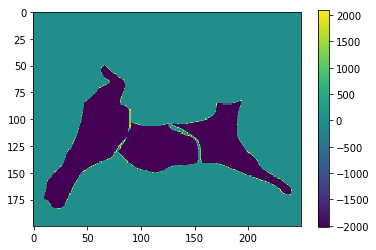

In [37]:
plt.figure()
hmap = plt.imshow(wmap)
plt.colorbar(hmap)
plt.savefig('/tmp/test.png')

In [38]:
pwd

'/run/media/dhruv/Gryffindor/Project/Cybergut/Implementation/Notebooks'

# WithWmap Dataset

In [4]:
from utils import wmap_dataset

In [10]:
root_dir = '/home/dhruv/Cybergut/Data/26-09-18/516x516/train/'

In [11]:
def opener(x):
    return Image(filename=x)

In [35]:
ds = wmap_dataset.WithWmap(root_dir, Composese([
    wtsfms.ToNumpyArray(['gray', 'bgr'])
]), w_0=.25, w_1 = .75, w_2=1, sigma=20, image_opener=opener, mask_opener=opener)

In [36]:
x,y,z,t = ds[ds.basenames.index('B - 3(fld 01 wv TL-Brightfield - dsRed)_1')]

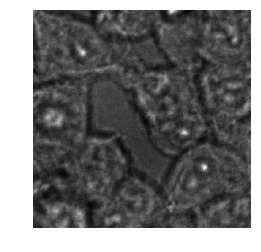

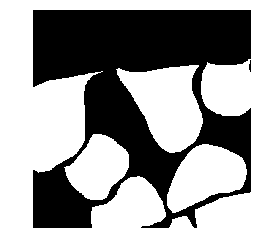

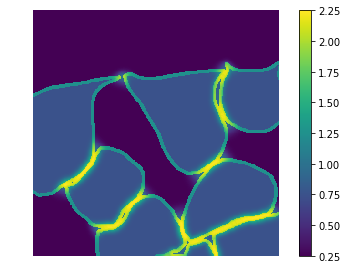

In [39]:
plt.axis('off')
plt.imshow(x[0], cmap='gray')
plt.savefig('/tmp/orig.png')
plt.figure()
plt.axis('off')
plt.imshow(y, cmap='gray')
fig = plt.figure()
plt.axis('off')
tmp = plt.imshow(z)
fig.colorbar(tmp)
fig.tight_layout()
plt.savefig('/tmp/wmap.png', bbox_inches='tight')

In [77]:
t

'B - 3(fld 01 wv TL-Brightfield - dsRed)_1'

In [64]:
ds.msk_path.format(t)

'/home/dhruv/Cybergut/Data/20-9-18/processed/groundtruth/512Patches/516x516/train/Masks/B - 3(fld 01 wv TL-Brightfield - dsRed)_1.png'

In [65]:
tmp = cv2.imread(ds.msk_path.format(t))

In [67]:
tmp.shape

(516, 516, 3)